In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
import matplotlib.pyplot as plt

## Load Dataset

In [1]:
# Step 1: Install and Configure Kaggle API
!pip install -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()  # Upload kaggle.json here
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 2: Download the Dataset
!kaggle datasets download -d blastchar/telco-customer-churn

# Step 3: Unzip the Dataset
!unzip telco-customer-churn.zip

# Step 4: Load and Display the Dataset
import pandas as pd
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
100% 172k/172k [00:00<00:00, 514kB/s]
100% 172k/172k [00:00<00:00, 513kB/s]
Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [3]:
data.drop(['customerID'], axis=1, inplace=True)

In [4]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [10]:
# Label encode categorical columns
label_encoders = {}
for col in X.select_dtypes(include=['object']):
  le = LabelEncoder()
  X[col] = le.fit_transform(X[col])
  label_encoders[col] = le

In [11]:
# Encode target variable
le_churn = LabelEncoder()
y = le_churn.fit_transform(y)

In [12]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [13]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

In [14]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),  # Dropout for regularization
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6641 - loss: 0.6976 - val_accuracy: 0.8025 - val_loss: 0.4291
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7636 - loss: 0.5010 - val_accuracy: 0.8037 - val_loss: 0.4155
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7808 - loss: 0.4684 - val_accuracy: 0.8068 - val_loss: 0.4055
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7881 - loss: 0.4529 - val_accuracy: 0.8068 - val_loss: 0.4019
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7879 - loss: 0.4509 - val_accuracy: 0.8086 - val_loss: 0.3971
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7882 - loss: 0.4449 - val_accuracy: 0.8092 - val_loss: 0.3968
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8029 - loss: 0.4400 - val_accuracy: 0.8164 - val_loss: 0.3941
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8028 - loss: 0.4311 - val_accuracy: 0.

## Evaluate the Model

In [16]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict probabilities
y_pred_proba = model.predict(X_test).flatten()

# Convert probabilities to binary predictions
y_pred = (y_pred_proba > 0.5).astype(int)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")

Test Accuracy: 0.84
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1021
           1       0.84      0.85      0.84      1049

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070

ROC-AUC Score: 0.92


## Visualize Training History

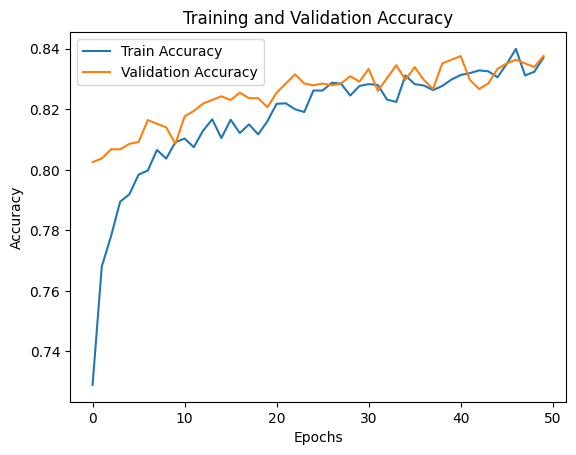

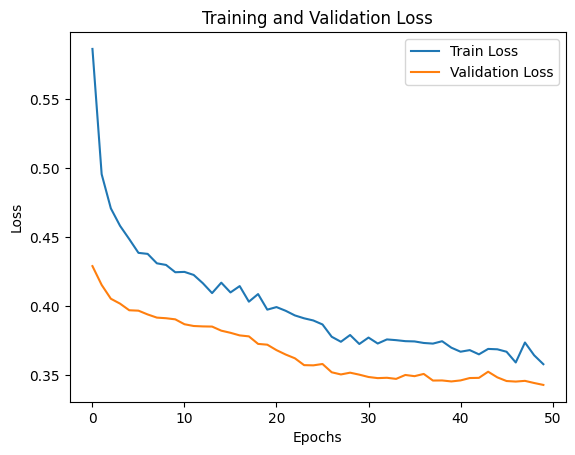

In [17]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

## ROC Curve

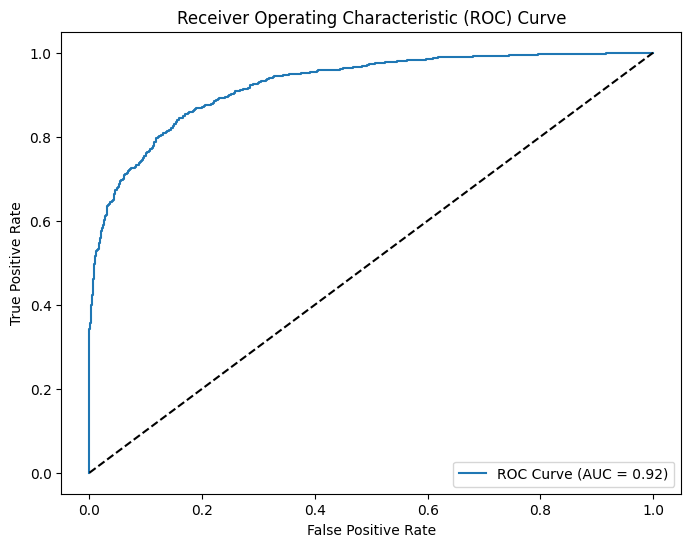

In [18]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Prediction

In [21]:
def predict_single_customer(model, scaler, single_data, label_encoder):
    """
    Predict the churn probability, binary outcome, and actual value for a single customer.

    Parameters:
    model: Trained Keras model
    scaler: Scaler used to standardize the features
    single_data: A single row of customer data (as a 1D numpy array or pandas Series)
    label_encoder: Label encoder used to encode the target variable

    Returns:
    dict: Churn probability, binary prediction, and actual churn value
    """
    # Ensure single_data is in the correct shape (1, n_features)
    if len(single_data.shape) == 1:
        single_data = single_data.reshape(1, -1)

    # Standardize the single data row using the scaler
    single_data_scaled = scaler.transform(single_data)

    # Predict churn probability
    churn_probability = model.predict(single_data_scaled)[0][0]  # Flatten to scalar

    # Determine binary prediction (churn or no churn)
    churn_prediction = int(churn_probability > 0.5)  # 0 for no churn, 1 for churn

    # Decode the binary prediction to the actual label
    actual_value = label_encoder.inverse_transform([churn_prediction])[0]

    return {
        "churn_probability": churn_probability,
        "churn_prediction": churn_prediction,
        "actual_value": actual_value
    }


In [22]:
# Select a single row from the test dataset (e.g., the first row)
single_customer_data = X_test[0]  # Assuming X_test is a numpy array or pandas DataFrame

# Predict churn for the single customer
result = predict_single_customer(model, scaler, single_customer_data, le_churn)

# Print the results
print(f"Churn Probability: {result['churn_probability']:.2f}")
print(f"Churn Prediction (Numeric): {result['churn_prediction']}")
print(f"Churn Prediction (Actual Value): {result['actual_value']}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Churn Probability: 0.40
Churn Prediction (Numeric): 0
Churn Prediction (Actual Value): 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
